# Tarea individual Machine Learning

El nombre del alumno debe estar en el nombre del notebook a continuación de 'Tarea Individual'.
<br>
* Por ejemplo: <strong>Tarea Individual Nombre Apellidos</strong>
<br>
* Para cambiar el nombre: pincha en el nombre del notebook (a la derecha del icono 'Jupyter') y añade tu nombre.
<br>
<br>
Una vez se hayan resuelto los ejercicios, por favor, expórtalo a HTML y súbelo al Aula Virtual. Para exportarlo como HTML hay que pinchar en File > Download As > HTML.
<br>
<br>

### Objetivo del notebook

En este notebook vamos a recorrer diferentes algoritmos aprendidos a lo largo del módulo así como funciones y pasos realizados durante las prácticas.
<br>
El objetivo de esta tarea es repasar todo lo aprendido, saber aplicarlo y tener una buena ocasión para encontrar nuevas dudas y solucionarlas.

## Puntuación de la tarea individual

La tarea individual se dividirá en 4 fases:
 * **1. Regresión: 25 puntos.**
 * **2. Clasificación: 25 puntos.**
 * **3. Clustering: 25 puntos.**
 * **4. Reducción de dimensionalidad: 25 puntos.**
 
En total son 100 puntos. Cada fase es independiente de la otra, se pueden hacer en el orden que se desee. Cada fase tiene su propio dataset.

## Proceso a desarrollar.
En las celdas hay un comentario con lo que hay que hacer en dicha celda. Justo debajo del comentario se puede poner el código que se considere.


## Importante
Cada ejercicio es independiente, por lo que si estáis bloqueados con algún ejercicio podéis cambiar a otro mientras tanto y trabajarlo. Pero **es muy importante saber que si vais a trabajar en un ejercicio, debéis ejecutar las celdas desde el inicio de dicho ejercicio**. Por ejemplo: empiezo con Regresión pero hay algo que no me sale, por lo que lo dejo parado un rato y me pongo con clasificación. Poniendome con clasificación ejecuto la carga del dataframe y me pongo a trabajar. Entonces me doy cuenta de que puedo solucionar algo en regresion, y vuelvo al ejercicio para arreglarlo. **En ese punto, debes volver a ejecutar las celdas desde el principio de regresión hasta llegar a la celda en la que vas a meter código**. 
 Esto se debe hacer para que las variables que estés utilizando en los diferentes ejercicios, si se llaman igual, vuelvan a coger los datos correspondientes a ese ejercicio (si empiezo con regresión 'dt' tendrá los datos de regresión, si paso a clasificación debo meter los datos de clasificación a 'dt' cuando cargo el archivo, y si vuelvo a regresión debo ejecutar regresión desde el inicio para que 'dt', y más variables si se da el caso, vuelvan a tener los datos de regresión).

##### Estas son las librerías que son necesarias para ejecutar todo el notebook. 
* pandas
* matplotlib
* scikit learn
* seaborn

Ninguna más sería necesaria para completar la tarea siguiendo las prácticas, aún así, si se necesita añadir alguna por favor añadidla aquí.
Si faltara alguna librería por ejemplo seaborn se podría instalar metiendo una celda 
`!pip install seaborn`

##  0 - Carga de Librerías

In [67]:
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# 1. Regresión xG - Puntos

La dirección deportiva de un club de fútbol nos ha pedido desarrollar un modelo para predecir, en base a los xG de su equipo en la temporada, cuantos puntos tiene. Así, teniendo un histórico de equipos con su xG en la temporada y los puntos que obtuvieron, podemos sacar una serie de conclusiones: si hay cierta relación entre que un equipo sea muy atacante y los puntos que obtiene y si a final de temporada el propio club ha estado mejor o peor de lo que se debería en relación al xG vs Puntos.

<br>
<strong>
    Para seguir estos pasos, se recomienda ir paso a paso en el notebook 'CRISP-DM: Regresión'
</strong>

### 1.1 Estudio de los datos (5 puntos)

In [68]:
# Cargamos el dataset (en la carpeta data con nombre Regresion)
dt = pd.read_csv('data/Regresion.csv')

In [69]:
# Visualizar las 5 primeras muestras del dataset
dt.head()

,TeamName,Season,xG_Season,Goles_Season,Points
0,Villarreal CF,2017-2018,52.1,57,61
1,Villarreal CF,2018-2019,50.5,49,44
2,Valencia CF,2017-2018,55.9,65,73
3,Valencia CF,2018-2019,57.3,51,61
4,UD Las Palmas,2017-2018,37.8,24,22


In [70]:
# Visualizar los tipos de datos de cada variable
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TeamName      40 non-null     object 
 1   Season        40 non-null     object 
 2   xG_Season     40 non-null     float64
 3   Goles_Season  40 non-null     int64  
 4   Points        40 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ KB


In [71]:
# Visualizar los parámetros estadísticos del dataset
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
xG_Season,40.0,48.8625,11.005516,33.3,40.875,46.55,51.80,83.4
Goles_Season,40.0,50.1750,16.397135,24.0,40.750,47.00,58.25,99.0
Points,40.0,52.1000,16.014096,20.0,43.750,50.00,59.25,93.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed18b58e20>,
      dtype=object)

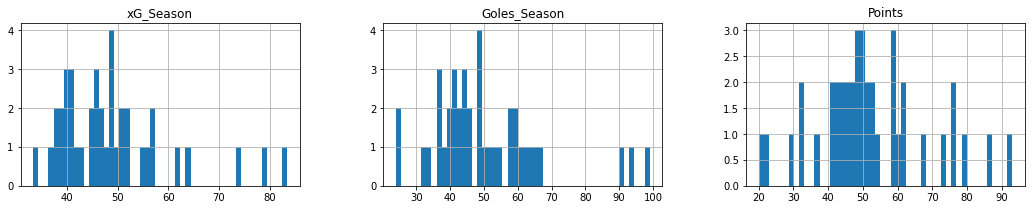

In [72]:
# Visualizar los histogramas del dataset
dt.hist(bins=50,figsize=(18,3), layout=(1,3))

### 1.2 Aplicación de algoritmo (10 puntos)

In [73]:
# Obtener dos set de datos: un set de train y otro de test.
# Fijar el tamaño del set de test en un 20% (0.2)
size = 0.2
train_set, test_set = train_test_split(dt, test_size=size, random_state=42)

In [74]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 39 to 38
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TeamName      32 non-null     object 
 1   Season        32 non-null     object 
 2   xG_Season     32 non-null     float64
 3   Goles_Season  32 non-null     int64  
 4   Points        32 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [75]:
# Obtener la matriz de correlación frente a la variable que queremos predecir (Points) en el set de train
corr_matrix = train_set.corr()
corr_matrix['Points'].sort_values(ascending=False)

Points          1.000000
Goles_Season    0.783587
xG_Season       0.710175
Name: Points, dtype: float64

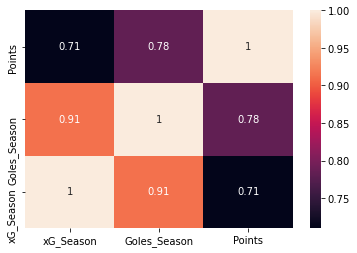

In [76]:
# Mostrar las correlaciones mediante un heatmap en el set de train
corr_matrix = train_set.corr()
heatmap = sn.heatmap(corr_matrix, annot=True)
heatmap.set(ylim=(0,len(corr_matrix)))
heatmap.set(xlim=(0,len(corr_matrix)))

plt.show()

In [77]:
# Coger sólo las columnas xG_Season (feature) y Points (label) del set de train
# Como se ha hecho en PreparingData_v2 pero con train_set en lugar de dt.
train_set = train_set[['xG_Season', 'Points']]

In [78]:
# Escalar la columna xG_Season en el set de train (StandardScaler)
# Como se ha hecho en PreparingData (Standarization) pero solo con xG_Season en lugar de Goals y Year
train_set[['xG_Season']] = StandardScaler().fit_transform(train_set[['xG_Season']])

In [79]:
train_set.head()

,xG_Season,Points
39,-0.847926,53
6,1.375367,59
25,-0.242434,55
9,0.154921,47
13,3.248609,76


In [80]:
# Separar el set de train en features y labels. Vamos a trabajar con dos variables: labels es Points y features es xG_Season.
# Como se ha hecho en splitDT pero poniendo 'Points' en lugar de label, cambiando train_set por dt y llamando
# a labels y_train y a features X_train
def splitTS(train_set, label):
    labels = train_set[[label]]
    features = train_set.drop([label], axis=1)

    return features, labels

In [81]:
X_train, y_train = splitTS(train_set, 'Points')

### No tocar la siguiente celda puesto que tiene 3 funciones auxiliares en estado final

In [82]:
def Display_Score(labels, predictions):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    print("No Cross Validation")
    print("RMSE Score: ", rmse)
    print("----------")
    
def Display_CV_Scores(scores):
    rmse_scores = np.sqrt(-scores)
    print("Cross Validation")
    print("RMSE Scores:", rmse_scores)
    print("RMSE Mean:", rmse_scores.mean())
    print("RMSE Standard deviation:", rmse_scores.std())
    
def VisualizeRegression(X, y, pred):
    
    X = X.loc[:, [X.columns[0]]]
    y = y.loc[:, [y.columns[0]]]

    inds = X.values.ravel().argsort()
    X = X.values.ravel()[inds].reshape(-1,1)
    y = y.values[inds]
    pred = pred[inds]
    
    fig, ax =  plt.subplots(figsize=(8, 6))
    ax.scatter(X, y,  color='blue', marker='.',)
    ax.plot(X, pred, color='red', label="Predictions")
    ax.set_title("xG_Season vs Points")
    ax.set_xlabel("xG_Season (after StandardScaler)")
    ax.set_ylabel("Points")
    plt.show()

No Cross Validation
RMSE Score:  9.885288955478003
----------
Cross Validation
RMSE Scores: [ 7.72146431 11.15535972  5.23024075  6.22755021 14.61344666 20.68159388
  3.15447183  6.06413303 14.6975283  10.85166912]
RMSE Mean: 10.039745778737128
RMSE Standard deviation: 5.138263514961002


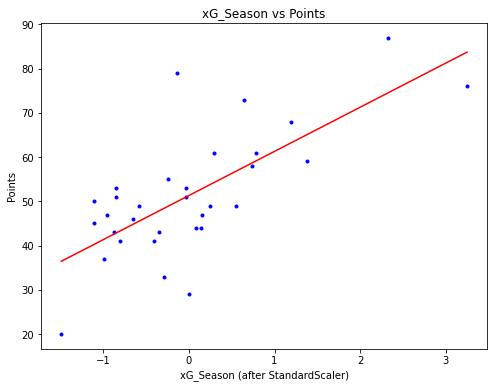

In [83]:
#####################
# Aplicar Linear Regression. Usar las funciones dadas para ello.
#####################

# Entrenamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
lin_reg_pred = lin_reg.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, lin_reg_pred)

# Métricas obtenidas con CV
lin_reg_cv = LinearRegression()
lin_reg_cv_scores = cross_val_score(lin_reg_cv, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
Display_CV_Scores(lin_reg_cv_scores)

# Visualizacion
VisualizeRegression(X_train, y_train, lin_reg_pred)

### 1.3 Evaluando el algoritmo (10 puntos)

In [84]:
# Coger sólo las columnas xG_Season (feature) y Points (label) del set de test
# Como se ha hecho en PreparingData_v2 pero con test_set en lugar de dt.
test_set = test_set[['xG_Season', 'Points']]

In [85]:
# Escalar la columna xG_Season en el set de test (StandardScaler)
# Como se ha hecho en PreparingData (Standarization) pero solo con xG_Season en lugar de Goals y Year
test_set[['xG_Season']] = StandardScaler().fit_transform(test_set[['xG_Season']])

In [86]:
# Separar el set de test en features y labels. Vamos a trabajar con dos variables: labels es Points y features es xG_Season.
# Como se ha hecho en splitDT pero poniendo 'Points' en lugar de label, cambiando test_set por dt y llamando
# a labels y_test y a features X_test
def splitTestS(test_set, label):
    labels = test_set[[label]]
    features = test_set.drop([label], axis=1)

    return features, labels

In [87]:
X_test, y_test = splitTestS(test_set, 'Points')

RMSE:  15.44201823073399


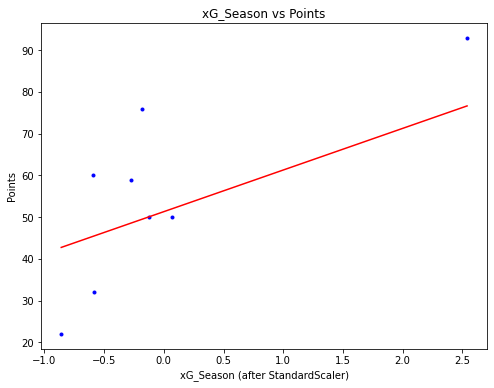

In [88]:
#####################
# Evaluar Linear Regression
# NOTA: usar el modelo que has entrenado aquí '{model}.fit(X_train, y_train)'
# Por ejemplo, en la práctica tenemos lin_reg y lin_reg_cv. Pues debemos usar lin_reg, es decir, el que usamos en
# lin_reg.fit()(X_train, y_train). El nombre del modelo que hayas puesto en tu fase de entrenamiento, debes ponerlo
# antes de 'predict'. Siguiendo el mismo ejemplo, lin_reg.predict
#####################

# Predicciones en el set de test
final_prediction = lin_reg.predict(X_test)

# Las métricas obtenidas en el test set (RMSE)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
print("RMSE: ", final_rmse)

# Visualizacion
VisualizeRegression(X_test, y_test, final_prediction)

# 2. Clasificación - 10 primeros Liga

La dirección deportiva de un club de fútbol español nos ha pedido desarrollar un modelo de machine learning con el que podamos **predecir si un equipo va a quedar entre los diez primeros o no**, o lo que es lo mismo, en la primera mitad de la clasificación. La idea que tienen es que si se tiene un histórico de datos y se puede predecir si un equipo estará entre los mejores o no en base a su performance en esa temporada, podrían sacar conclusiones antes de final de temporada y anticiparse a lo que está por venir.

Nos comentan en la reunión que el histórico de partidos se refiere a la temporada 17/18 y a las principales ligas europeas: España, Italia, Alemania, Francia e Inglaterra.
Nos comentan que el dataset tiene como datos el nombre del equipo, la competición, la temporada, el xG, el xA (expected assitances), la posición y si el equipo estuvo en la primera mitad o en la segunda. Este análisis lo hacen porque les interesa mucho saber si el ser muy atacante así como con juego colaborativo hace tender a un equipo a estar entre los mejores.

<br>
<strong>
    Para seguir estos pasos, se recomienda ir paso a paso en el notebook 'CRISP-DM: Clasificación'
</strong>

### 2.1 Estudio de los datos (5 puntos)

In [89]:
# Cargamos el dataset (en la carpeta data con nombre Clasificacion)
dt = pd.read_csv('data/Clasificacion.csv')

In [90]:
# Visualizar las 5 primeras muestras del dataset
dt.head()

,TeamName,CompName,Season,xG,xA,Position,Best_Teams
0,1. FC Köln,Fußball-Bundesliga,2017-2018,42.6,28.7,18°,0
1,1. FSV Mainz 05,Fußball-Bundesliga,2017-2018,35.2,24.3,14°,0
2,AC ChievoVerona,Serie A,2017-2018,32.4,22.1,13°,0
3,AC Milan,Serie A,2017-2018,55.9,36.3,6°,1
4,ACF Fiorentina,Serie A,2017-2018,58.3,37.1,8°,1


In [91]:
# Visualizar los tipos de datos de cada variable
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TeamName    98 non-null     object 
 1   CompName    98 non-null     object 
 2   Season      98 non-null     object 
 3   xG          98 non-null     float64
 4   xA          98 non-null     float64
 5   Position    98 non-null     object 
 6   Best_Teams  98 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 5.5+ KB


In [92]:
# Visualizar los parámetros estadísticos del dataset
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
xG,98.0,51.538776,16.340763,31.4,40.30,46.10,57.950,106.6
xA,98.0,34.398980,11.883875,18.3,26.15,30.55,39.825,77.6
Best_Teams,98.0,0.500000,0.502571,0.0,0.00,0.50,1.000,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed0897aa90>,
      dtype=object)

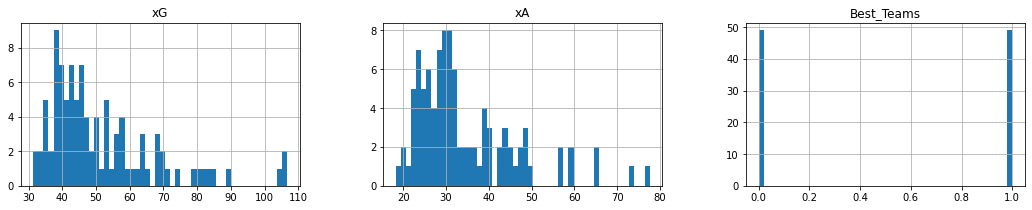

In [93]:
# Visualizar los histogramas del dataset
dt.hist(bins=50,figsize=(18,3), layout=(1,3))

### 2.2 Aplicación de algoritmo (10 puntos)

In [94]:
# Obtener dos set de datos: un set de train y otro de test.
# Fijar el tamaño del set de test en un 20% (0.2)
size = 0.2
train_set, test_set = train_test_split(dt, test_size=size, random_state=42)

In [95]:
# Obtener la matriz de correlación frente a la variable que queremos predecir (Best_Teams) en el set de train
corr_matrix = train_set.corr()
corr_matrix['Best_Teams'].sort_values(ascending=False)

Best_Teams    1.000000
xA            0.548653
xG            0.541883
Name: Best_Teams, dtype: float64

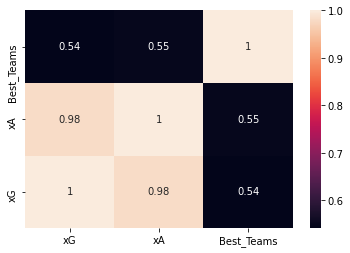

In [96]:
# Mostrar las correlaciones mediante un heatmap en el set de train
corr_matrix = train_set.corr()
heatmap = sn.heatmap(corr_matrix, annot=True)
heatmap.set(ylim=(0,len(corr_matrix)))
heatmap.set(xlim=(0,len(corr_matrix)))

plt.show()

In [97]:
# Coger sólo las columnas xG, xA (features) y Best_Teams (label) del set de train
# Como se ha hecho en PreparingData_v2 pero con train_set en lugar de dt.
train_set = train_set[['xG', 'xA', 'Best_Teams']]

In [98]:
# Escalar la columna xG y xA en el set de train (StandardScaler)
# Como se ha hecho en PreparingData (Standarization) pero con xG y xA en lugar de Goals y Goals_Against
train_set[['xG','xA']] = StandardScaler().fit_transform(train_set[['xG','xA']])

In [99]:
# Separar el set de train en features y labels. Vamos a trabajar con dos variables: labels es Best_Teams y features son xG y xA.
# Como se ha hecho en splitDT pero poniendo 'Best_Teams' en lugar de label, cambiando train_set por dt y llamando
# a labels y_train y a features X_train
def splitTrainS(train_set, label):
    labels = train_set[[label]]
    features = train_set.drop([label], axis=1)

    return features, labels

In [100]:
X_train, y_train = splitTrainS(train_set, 'Best_Teams')

### No tocar la siguiente celda puesto que tiene 3 funciones auxiliares en estado final

In [101]:
def Display_Score(labels, predictions):
    acc = accuracy_score(labels, predictions)
    print("No Cross Validation")
    print("Accuracy Score: ", acc)
    print("----------")
    
def Display_CV_Scores(scores):
    print("Cross Validation")
    print("Accuracy Scores:", scores)
    print("Accuracy Mean:", scores.mean())
    print("Accuracy Standard deviation:", scores.std())
    
def VisualizeConfusionMatrix(X, y, pred):
    
    cm = confusion_matrix(y, pred)
    
    df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (6,4))

    heatmap = sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')
    heatmap.set(ylim=(0,len(df_cm)))
    heatmap.set(xlim=(0,len(df_cm)))

No Cross Validation
Accuracy Score:  0.7948717948717948
----------
Cross Validation
Accuracy Scores: [0.75       0.75       0.875      0.875      0.75       0.75
 0.75       0.875      0.85714286 0.57142857]
Accuracy Mean: 0.7803571428571427
Accuracy Standard deviation: 0.09001487972234687


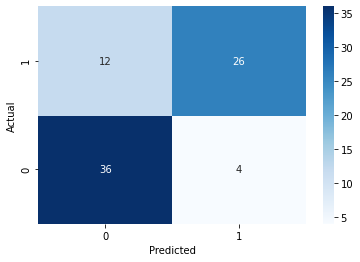

In [102]:
#####################
# Aplicar Logistic Regression. Usar las funciones dadas para ello.
#####################

# Entrenamos el modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicciones en el set de entrenamiento
lr_pred = lr.predict(X_train)

# Métricas obtenidas sin CV
Display_Score(y_train, lr_pred)

# Métricas obtenidas con CV
lr_cv = LogisticRegression(random_state=42)
lr_cv_scores = cross_val_score(lr_cv, X_train, y_train, scoring="accuracy", cv=10)
Display_CV_Scores(lr_cv_scores)

# Visualizacion
VisualizeConfusionMatrix(X_train, y_train, lr_pred)

## 2.3 Evaluando el algoritmo (10 puntos)

In [103]:
# Coger sólo las columnas xG y xA (features) y Best_Teams (label) del set de test
# Como se ha hecho en PreparingData_v2 pero con test_set en lugar de dt.
test_set = test_set[['xG', 'xA', 'Best_Teams']]

In [104]:
# Escalar la columna xG y xA en el set de test (StandardScaler)
# Como se ha hecho en PreparingData (Standarization) pero con xG y xA en lugar de Goals y Goals_Against
test_set[['xG','xA']] = StandardScaler().fit_transform(test_set[['xG','xA']])

In [105]:
# Separar el set de test en features y labels
# Como se ha hecho en splitDT pero poniendo 'Best_Teams' en lugar de label, cambiando test_set por dt y llamando
# a labels y_test y a features X_test
def splitTestS(test_set, label):
    labels = test_set[[label]]
    features = test_set.drop([label], axis=1)

    return features, labels

In [106]:
X_test, y_test = splitTestS(test_set, 'Best_Teams')

Accuracy Score:  0.9


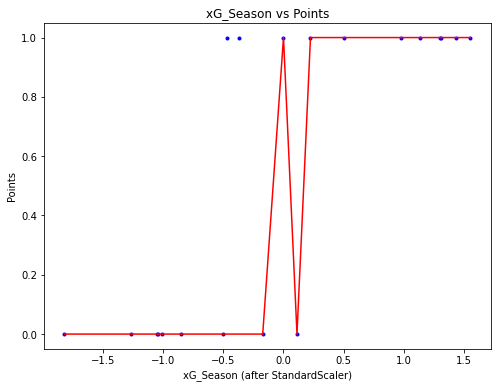

In [107]:
#####################
# Evaluar Logistic Regression
# NOTA: usar el modelo que has entrenado aquí '{model}.fit(X_train, y_train)'
# Por ejemplo, en la práctica tenemos lr y lr_cv. Pues debemos usar lr, es decir, el que usamos en
# lr.fit()(X_train, y_train). El nombre del modelo que hayas puesto en tu fase de entrenamiento, debes ponerlo
# antes de 'predict'. Siguiendo el mismo ejemplo, lr.predict
#####################

# Predicciones en el set de test
final_predict = lr.predict(X_test)

# Las métricas obtenidas en el test set (Accuracy)
acc = accuracy_score(y_test, final_predict)
print("Accuracy Score: ", acc)

# Visualizacion
VisualizeRegression(X_test, y_test, final_predict)

# 3. Clustering Delanteros

El club deportivo para el que trabajamos nos han comentado la necesidad de **buscar a un delantero centro interesante** en el mercado. Nos han pedido ayuda para intentar conocer mejor los delanteros centro que hay disponibles y poder agruparlos, de este modo poder conocer mejor cuales se parecen entre ellos y tener unas conclusiones más interesantes antes de ir al mercado.
Si nos interesa un jugador concreto, podemos buscar similares a ver si nos parecen igual de interesante y surge una oportunidad.

<br>
<strong>
    Para seguir estos pasos, se recomienda ir paso a paso en el notebook 'Clustering: Data Analysis'
</strong>

### 3.1 Estudio de los datos (5 puntos)

In [108]:
# Cargamos el dataset (en la carpeta data con nombre Clustering)
dt = pd.read_csv('data/Clustering.csv')

In [109]:
# Visualizar las 5 primeras muestras del dataset
dt.head()

,PlayerName,TeamName,Season,Gol/Sh,npxG/Sh
0,Erling Håland,Borussia Dortmund,2019-2020,0.37,0.23
1,Mauro Icardi,Paris Saint-Germain FC,2019-2020,0.33,0.28
2,Jadon Sancho,Borussia Dortmund,2019-2020,0.33,0.18
3,Andreas Cornelius,Parma FC,2019-2020,0.27,0.16
4,Ante Rebic,AC Milan,2019-2020,0.26,0.17


In [110]:
# Visualizar los tipos de datos de cada variable
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PlayerName  93 non-null     object 
 1   TeamName    93 non-null     object 
 2   Season      93 non-null     object 
 3   Gol/Sh      93 non-null     float64
 4   npxG/Sh     93 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.8+ KB


In [111]:
# Escalar las variables Gol/Sh y npxG/Sh
# Recomendación: como hacemos en el notebook, crea unas variables (std) y luego escala.
dt['Gol/Sh_std'] = dt['Gol/Sh']
dt['npxG/Sh_std'] = dt['npxG/Sh']

dt[['Gol/Sh_std', 'npxG/Sh_std']] = StandardScaler().fit_transform(dt[['Gol/Sh', 'npxG/Sh']])

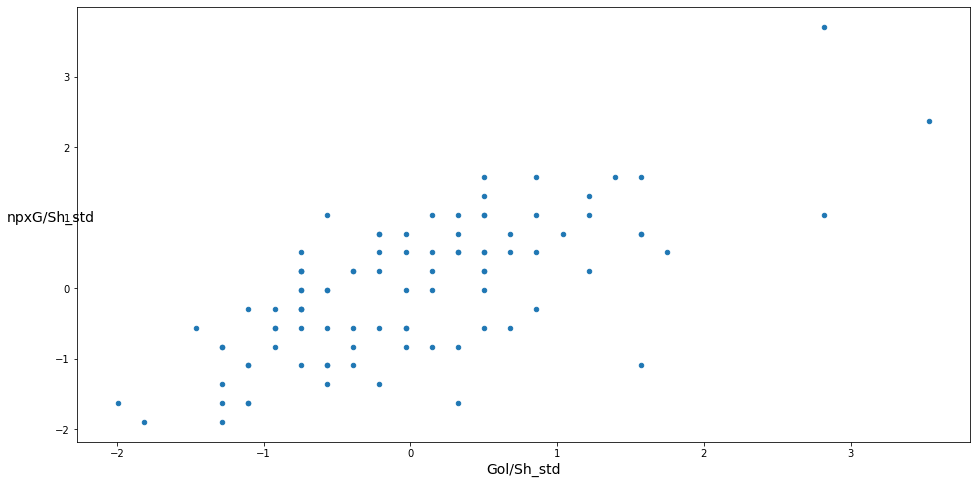

In [112]:
# Visualizamos los datos
X = dt[['Gol/Sh_std', 'npxG/Sh_std']].values
plt.figure(figsize=(16, 8))
plt.scatter(X[:, 0], X[:, 1], c=None, s=20)
plt.xlabel("Gol/Sh_std", fontsize=14)
plt.ylabel("npxG/Sh_std", fontsize=14, rotation=0)
plt.show()

### 3.2 Obtención del número de clusters (10 puntos)

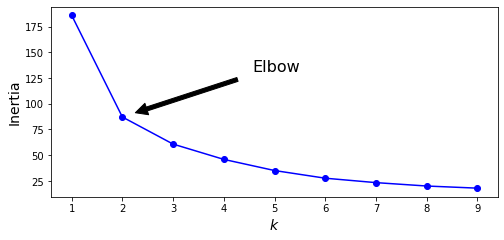

In [113]:
# Visualizamos la inercia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.5, 0.7),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

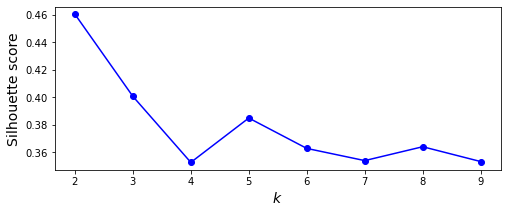

In [114]:
# Visualizamos el sillhoute score
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

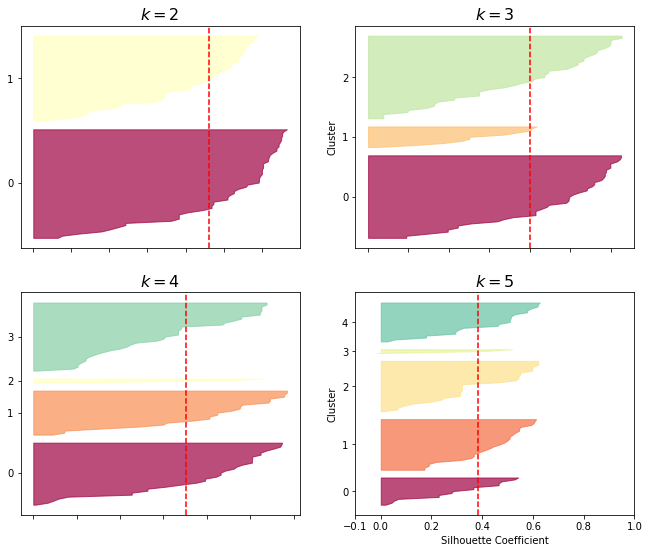

In [115]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [116]:
# Seleccionamos un número de clusters K. Cambiar K=1 por el número que consideres.
# Recomendación: hay que mirar en la inercia y el score, quizás podemos apostar por un poquito de menos score.
K = 2

### 3.3 Visualizar los clusters (10 puntos)

### No tocar la siguiente celda puesto que tiene 3 funciones auxiliares en estado final

In [117]:
def Exec_KMeans(k, X):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    print("Centros de los clusters: ", kmeans.cluster_centers_)
    
    plt.figure(figsize=(16, 6))
    cl = ['red', 'green', 'blue', 'yellow', 'black']
    assign = []
    for row in y_pred:
        assign.append(cl[row])
        
    plt.scatter(X[:,0], X[:,1], c=assign, s=70)
    
    plt.show()
    
    return y_pred

Centros de los clusters:  [[-0.6364474  -0.65800702]
 [ 0.80720158  0.83454548]]


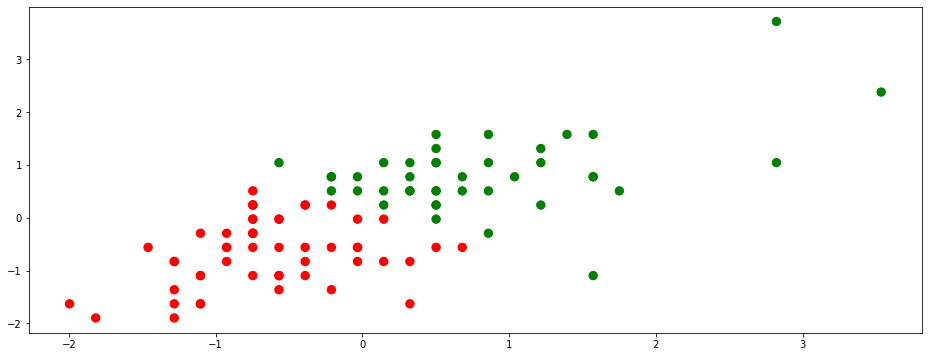

,PlayerName,TeamName,Season,Gol/Sh,npxG/Sh,Gol/Sh_std,npxG/Sh_std,Cluster
0,Erling Håland,Borussia Dortmund,2019-2020,0.37,0.23,3.535507,2.379369,1
1,Mauro Icardi,Paris Saint-Germain FC,2019-2020,0.33,0.28,2.821884,3.715609,1
2,Jadon Sancho,Borussia Dortmund,2019-2020,0.33,0.18,2.821884,1.043129,1
3,Andreas Cornelius,Parma FC,2019-2020,0.27,0.16,1.751448,0.508633,1
4,Ante Rebic,AC Milan,2019-2020,0.26,0.17,1.573042,0.775881,1


In [118]:
# Ejecutamos KMeans con el número de clusters (K) que hayas elegido y guardalo en una variable 'Cluster'
# en el dataset original (dt, si es tu caso)
selectedK = 2
dt['Cluster'] = Exec_KMeans(selectedK, X)

dt.head()

In [119]:
# Echa un vistazo al dataset con los diferentes jugadores en cada cluster. Deja seleccionado el cluster 0.
dt[dt['Cluster']==0].sort_values(by=['Gol/Sh', 'npxG/Sh'], ascending=False)

,PlayerName,TeamName,Season,Gol/Sh,npxG/Sh,Gol/Sh_std,npxG/Sh_std,Cluster
19,Harry Kane,Tottenham Hotspur FC,2019-2020,0.21,0.12,0.681012,-0.560359,0
25,Patrik Schick,RB Leipzig,2019-2020,0.20,0.12,0.502606,-0.560359,0
34,Josip Ilicic,Atalanta BC,2019-2020,0.19,0.11,0.324200,-0.827607,0
32,Jeremie Boga,US Sassuolo Calcio,2019-2020,0.19,0.08,0.324200,-1.629351,0
39,Nils Petersen,SC Freiburg,2019-2020,0.18,0.14,0.145794,-0.025863,0
40,Ángel Rodríguez,Getafe CF,2019-2020,0.18,0.11,0.145794,-0.827607,0
45,Robin Quaison,1. FSV Mainz 05,2019-2020,0.17,0.14,-0.032612,-0.025863,0
42,Luis Muriel,Atalanta BC,2019-2020,0.17,0.12,-0.032612,-0.560359,0
43,Ciro Immobile,SS Lazio,2019-2020,0.17,0.12,-0.032612,-0.560359,0
46,João Pedro,Cagliari Calcio,2019-2020,0.17,0.11,-0.032612,-0.827607,0


In [120]:
dt[dt['Cluster']==1].sort_values(by=['Gol/Sh', 'npxG/Sh'], ascending=False)

,PlayerName,TeamName,Season,Gol/Sh,npxG/Sh,Gol/Sh_std,npxG/Sh_std,Cluster
0,Erling Håland,Borussia Dortmund,2019-2020,0.37,0.23,3.535507,2.379369,1
1,Mauro Icardi,Paris Saint-Germain FC,2019-2020,0.33,0.28,2.821884,3.715609,1
2,Jadon Sancho,Borussia Dortmund,2019-2020,0.33,0.18,2.821884,1.043129,1
3,Andreas Cornelius,Parma FC,2019-2020,0.27,0.16,1.751448,0.508633,1
6,Francesco Caputo,US Sassuolo Calcio,2019-2020,0.26,0.20,1.573042,1.577625,1
4,Ante Rebic,AC Milan,2019-2020,0.26,0.17,1.573042,0.775881,1
5,Kasper Dolberg,OGC Nice,2019-2020,0.26,0.17,1.573042,0.775881,1
7,Mason Greenwood,Manchester United FC,2019-2020,0.26,0.10,1.573042,-1.094855,1
8,Andrej Kramaric,TSG 1899 Hoffenheim,2019-2020,0.25,0.20,1.394636,1.577625,1
10,Sadio Mané,Liverpool FC,2019-2020,0.24,0.19,1.216230,1.310377,1


# 4. Reducción de dimensionalidad - Jugador Similar a Paulo Dybala

Un club de fútbol europeo, de gran presupuesto, nos ha pedido que encontremos al jugador más parecido a <strong>Paulo Dybala</strong>. Este jugador es de gran interés para dicho club, pero no es posible el traspaso y por ello necesitan ayuda para encontrar al centrocampista más parecido. Nos ofrecen un set de datos de centrocampistas de las principales ligas europeas de la temporada 2017/2018. Por lo que las métricas que nos ofrecen son de ese año. Asumen que dicha similitud que logremos sería en base a lo de ese año, pero les compensa aun así.

Por lo que debemos trabajar con ese dataset para encontrar a los centrocampistas más parecidos a dicho futbolista basándonos en las métricas de ese año, es decir, 'los futbolistas más parecidos en ese año'. Con esta información, empezará el departamento de scouting a analizar más en detalle.

<br>
<strong>
    Para seguir estos pasos, se recomienda ir paso a paso en el notebook 'Dimensionality Reduction: PCA'
</strong>

### 4.1 Estudio de los datos (5 puntos)

In [121]:
# Cargamos el dataset (en la carpeta data con nombre PCA)
dt = pd.read_csv('data/PCA.csv')

In [122]:
# Visualizar las 5 primeras muestras del dataset
dt.head()

,PlayerName,Edad,Goles,Asistencias,Tarjetas_Amarilla,Tarjetas_Roja,PasesCompletados,PasesIntentados,Pct_PasesCompletados,PasesUltTercioCampo,PasesClave,PasesCruzados,PasesCambioDeBanda,xG,npxG,xA,xG_90Min,xA_90Min
0,Stanislav Lobotka,22,0,0,2,0,1858,2065,90.0,169,10,6,52,0.3,0.3,0.5,0.01,0.01
1,Daniel Wass,28,4,8,3,0,1250,1667,75.0,116,56,97,63,4.4,4.4,5.0,0.13,0.15
2,Pione Sisto,22,5,7,2,0,876,1091,80.3,65,42,56,50,3.8,3.8,4.6,0.13,0.16
3,Fabinho,23,7,3,8,0,1680,1976,85.0,210,34,9,65,5.5,2.4,3.7,0.16,0.11
4,Rony Lopes,21,15,6,2,0,579,841,68.8,40,39,82,18,9.8,9.8,5.5,0.35,0.19


In [123]:
# Visualizar los tipos de dato de cada variable
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlayerName            268 non-null    object 
 1   Edad                  268 non-null    int64  
 2   Goles                 268 non-null    int64  
 3   Asistencias           268 non-null    int64  
 4   Tarjetas_Amarilla     268 non-null    int64  
 5   Tarjetas_Roja         268 non-null    int64  
 6   PasesCompletados      268 non-null    int64  
 7   PasesIntentados       268 non-null    int64  
 8   Pct_PasesCompletados  268 non-null    float64
 9   PasesUltTercioCampo   268 non-null    int64  
 10  PasesClave            268 non-null    int64  
 11  PasesCruzados         268 non-null    int64  
 12  PasesCambioDeBanda    268 non-null    int64  
 13  xG                    268 non-null    float64
 14  npxG                  268 non-null    float64
 15  xA                    2

In [124]:
# Pasamos las métricas a una matriz X y los nombres de los jugadores a una matriz y
X, y = dt.iloc[:, 1:len(dt.columns)].values, dt.iloc[:, 0].values

### 4.2 Obtención del número de componentes (10 puntos)

In [125]:
# Escalamos la matriz X
X_std = StandardScaler().fit_transform(X)

In [126]:
# Aplicamos PCA para obtener una matriz x pero con las dimensiones (X_pca)
pca = PCA(n_components = len(dt.columns)-1)
pca.fit(X_std)
X_pca = pca.transform(X_std)

Shape x_PCA:  (268, 17)
Explained Variance: 0 components: 0
Explained Variance: 2 components: 0.6057763618759013
Explained Variance: 4 components: 0.7913051593893251
Explained Variance: 6 components: 0.8920389485394619
Explained Variance: 8 components: 0.9443915679500731
Explained Variance: 10 components: 0.9775444464822025
Explained Variance: 12 components: 0.9903895685625357
Explained Variance: 14 components: 0.9980209398240856
Explained Variance: 16 components: 0.9998778607727566


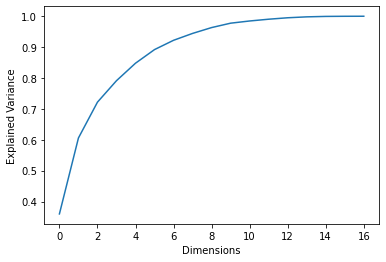

In [127]:
# Visualizamos las dimensiones para determinar qué número nos interesa más
print("Shape x_PCA: ", X_pca.shape)
expl = pca.explained_variance_ratio_

for x in range(0, len(dt.columns), 2):
    print("Explained Variance: " + str(x) + " components:", sum(expl[0:x]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.show()

In [128]:
# Seleccionamos el número de componentes y mostramos (head) el dataframe con las dimensiones
N_COMP = 10
columns = []

for col in range(1, N_COMP+1, 1):
    columns.append("PCA" + str(col))

dt_pca_resultado = pd.DataFrame(data=X_pca[:,0:N_COMP], columns=columns, index = y)

dt_pca_resultado.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
Stanislav Lobotka,-4.121911,0.588617,1.185821,-2.127377,0.594480,-0.305093,-0.943728,-0.095647,0.080866,-0.178062
Daniel Wass,1.299715,1.721811,-1.316289,-0.317106,-0.665471,-0.244217,-0.479155,0.810038,0.327440,-0.759715
Pione Sisto,1.054865,-0.075274,-0.796471,-1.182270,0.885542,-0.438043,0.238301,-0.186621,0.533419,-0.870531
Fabinho,-1.189690,1.894763,1.901538,-0.432187,0.531688,1.005850,0.353496,-0.227902,0.217093,0.173998
Rony Lopes,4.503468,-1.661998,0.570938,-0.332270,0.598618,0.542238,-0.632987,0.590453,-0.153250,-0.227218


### 4.3 Matriz de correlación y listado de centrocampistas (10 puntos)

In [129]:
# Obtenemos la matriz de correlación (Pearson)
corr_matrix = dt_pca_resultado.T.corr(method='pearson')

In [130]:
# Mostramos las primeras 5 muestras (head)
corr_matrix.head()

,Stanislav Lobotka,Daniel Wass,Pione Sisto,Fabinho,Rony Lopes,João Moutinho,Fabián Ruiz Peña,Joaquín,Javi García,Cristian Tello,Martin Olsson,Jordan Ayew,Tom Carroll,Tammy Abraham,Renaud Cohade,Nolan Roux,Aaron Mooy,Tom Ince,Rajiv van La Parra,Kevin-Prince Boateng,Asier Illarramendi,Mikel Oyarzabal,David Zurutuza,Sergio Canales,Adrien Rabiot,Giovani Lo Celso,Simone Missiroli,Francesco Magnanelli,Miralem Pjanic,Blaise Matuidi,Paulo Dybala,Douglas Costa,Daniel Parejo,Geoffrey Kondogbia,Gonçalo Guedes,Carlos Soler,Franck Kessié,Giacomo Bonaventura,Hakan Çalhanoglu,Saúl Ñíguez,Koke,Thomas Partey,Ángel Correa,Gabi,Abdoulaye Touré,Adrien Thomasson,Valentin Rongier,Borja Valero,Marcelo Brozovic,Lucas Tousart,Memphis Depay,Tanguy Ndombele,Houssem Aouar,Jorginho,Allan,Marek Hamšík,Piotr Zielinski,Ludovic Blas,Idrissa Gana Gueye,Wayne Rooney,Tom Davies,Dominic Calvert-Lewin,Jonathan Bamba,Dale Stephens,Davy Pröpper,Pascal Groß,Anthony Knockaert,José Izquierdo,Solly March,N'Golo Kanté,Marcos Alonso,Eden Hazard,Cesc Fàbregas,Willian,Pedro,Radja Nainggolan,Kevin Strootman,Ivan Radovanovic,Valter Birsa,Përparim Hetemaj,Nicolas Pépé,Yassine Benzia,Thiago Maia,Thiago Mendes,Luiz Araújo,Kevin Volland,Julian Brandt,Daniel Caligiuri,Amine Harit,Simone Padoin,Nicolò Barella,Artur Ioni?a,Paolo Faragò,Jonas Martin,Jean-Eudes Aholou,Dimitri Liénard,Dani García,Takashi Inui,Joan Jordán,Kevin De Bruyne,Fernandinho,Bernardo Silva,Benjamin Bourigeaud,Benjamin André,James Lea Siliki,Matt Ritchie,Ayoze Pérez,Mohamed Diamé,Pablo Sarabia,Éver Banega,David López,Sergi Darder,Léo Baptistão,Sergio García,Christian Günter,Janik Haberer,Riyad Mahrez,Wilfred Ndidi,Marc Albrighton,Demarai Gray,José Luis Morales,José Campaña,Jack Cork,Jóhann Berg Guðmundsson,Jeff Hendrick,Remo Freuler,Bryan Cristante,Papu Gómez,Marten de Roon,Hans Hateboer,Josip Ilicic,Portu,Borja García,Álex Granell,Pablo Maffeo,Pere Pons,Aday,Lucas Torreira,Dennis Praet,Gastón Ramírez,Gianluca Caprari,Romain Amalfitano,Naïm Sliti,Kwon Chang-hoon,Alfonso Pedraza,Ibai Gómez,Mohamed Salah,Georginio Wijnaldum,James Milner,Alex Oxlade-Chamberlain,Javier Eraso,Rubén Pérez,Pablo Zabaleta,Cheikhou Kouyaté,Marko Arnautovic,Amath,Francisco Portillo,Fayçal Fajr,Frederic Guilbert,Ronny Rodelin,Julien Féret,Lucas Leiva,Sergej Milinkovic-Savic,Luis Alberto,Marco Parolo,Senad Lulic,Adam Marušic,Thomas Mangani,Karl Toko Ekambi,Baptiste Santamaria,Flavien Tait,Andrea Bertolacci,Diego Laxalt,Goran Pandev,Theodor Gebre Selassie,Thomas Delaney,Maximilian Eggestein,Jay Rodriguez,Jake Livermore,Florian Thauvin,Luiz Gustavo,Dimitri Payet,Andre-Frank Zambo Anguissa,Morgan Sanson,Lucas Ocampos,Samuel Grandsir,Saîf-Eddine Khaoui,Bryan Pelé,Marco Asensio,Lucas Vázquez,Yunus Malli,Charlie Daniels,Joshua King,Jordon Ibe,Andros Townsend,Luka Milivojevic,Yohan Cabaye,James McArthur,Jordan Veretout,Federico Chiesa,Marco Benassi,Corentin Jean,Christian Eriksen,Dele Alli,Eric Dier,Son Heung-min,Moussa Sissoko,Oriol Romeu,Dušan Tadic,Nathan Redmond,Thorgan Hazard,Lars Stindl,Rolando Mandragora,Andrea Barberis,Adrian Stoian,Iñaki Williams,Raúl García,Markel Susaeta,Abdoulaye Doucouré,Richarlison,Roberto Pereyra,Rodri,Manu Trigueros,Pablo Fornals,Guilherme,Celso Borges,Ellyes Skhiri,Paul Lasne,Ruben Aguilar,Isaac Mbenza,Salomon Kalou,Gaël Kakuta,Thomas Monconduit,Harrison Manzala,Lionel Messi,Ivan Rakitic,Sergio Busquets,Paulinho,Simone Verdi,Andrea Poli,Erick Pulgar,Manuel Lazzari,Pasquale Schiattarella,Nemanja Matic,Jesse Lingard,Marcus Rashford,Granit Xhaka,Héctor Bellerín,Joe Allen,Xherdan Shaqiri,Erik Pieters,Mame Biram Diouf,Pierre Lees-Melou,Jean Seri,Lukas Lerager,Malcom,François Kamano,Tomás Rincón,Lorenzo De Silvestri,Daniele Baselli,Rômulo,Caiuby,Michael Gregoritsch,Antonín Barák,Jakub Jankto,Rodrigo De Paul,Mark Uth,Andrej Kramaric
Stanislav Lobotka,1.000000,-0.352542,-0.245812,0.813805,-0.678831,0.287514,0.882041,-0.323267,0.713343,-0.229676,-0.002664,-0.137338,0.321205,-0.171898,0.324004,-0.506100,0.256352,-0.169731,-0

### No tocar la siguiente celda puesto que tiene 3 funciones auxiliares en estado final

In [131]:
def GetSimilarPlayers(PlayerName, numPlayers, corr_matrix):
    
    SimPlayers = pd.DataFrame(columns = ['PlayerName', 'Similar Player', 'Correlation Factor'])

    i = 0
    for i in range(0, numPlayers):
        row = corr_matrix.loc[corr_matrix.index == PlayerName].squeeze()

        SimPlayers.at[i, 'PlayerName'] = PlayerName
        SimPlayers.at[i, 'Similar Player'] = row.nlargest(i+2).sort_values(ascending=True).index[0]
        SimPlayers.at[i, 'Correlation Factor'] = row.nlargest(i+2).sort_values(ascending=True)[0]

        i = i+1
    
    return SimPlayers

In [132]:
# Obtenemos los 10 centrocampistas más similares que nos piden en base a las métricas que nos han ofrecido.
# Nota, el nombre del jugador del cual hay que buscar sus similares es Paulo Dybala.
PlayerName = 'Paulo Dybala'
NumPlayers = 10

df_correlatedPlayers = GetSimilarPlayers(PlayerName, NumPlayers, corr_matrix)

df_correlatedPlayers

,PlayerName,Similar Player,Correlation Factor
0,Paulo Dybala,Mohamed Salah,0.905972
1,Paulo Dybala,Lionel Messi,0.888831
2,Paulo Dybala,Thorgan Hazard,0.866573
3,Paulo Dybala,Karl Toko Ekambi,0.859578
4,Paulo Dybala,Memphis Depay,0.856841
5,Paulo Dybala,Andrej Kramaric,0.805048
6,Paulo Dybala,Son Heung-min,0.788045
7,Paulo Dybala,Josip Ilicic,0.786409
8,Paulo Dybala,Bryan Cristante,0.774925
9,Paulo Dybala,Nicolas Pépé,0.75972
